In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import time
import h5py
import pickle
import csv

In [4]:
df = pd.read_csv("/Users/jpate/Downloads/netflix_titles.csv")

In [5]:
df = df.dropna(axis = 0)

In [6]:
type1 = {'Movie':0, 'TV Show':1}
df.replace({'type': type1}, inplace=True)

In [7]:
df = df[df["release_year"]>=2000]

<AxesSubplot:>

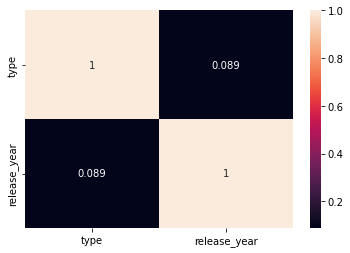

In [8]:
sns.heatmap(df.corr(),annot = True)

In [9]:
df = df[(df["rating"] != "NC-17") & (df["rating"] != "UR") & (df["rating"] != "TV-Y7-FV")]

In [10]:
type1 = {'TV-MA':0, 'TV-14':1, 'R':3, 'PG-13':4,'TV-PG':5, 'PG':6,'TV-G':7, 'TV-Y7':8,'TV-Y':7, 'NR':8, 'G':9 }
df.replace({'rating': type1}, inplace=True)

<AxesSubplot:xlabel='rating', ylabel='count'>

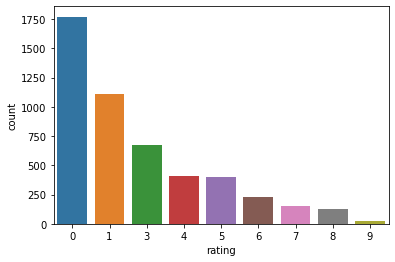

In [11]:
sns.countplot(x = df.rating, data = df)

In [12]:
tvdata = df[df["type"] == 1]

In [13]:
moviedata = df[df["type"] == 0]

In [14]:
moviedata["duration"] = moviedata["duration"].str.replace("min","")

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_31223/1563222211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata["duration"] = moviedata["duration"].str.replace("min","")


In [15]:
moviedata["duration"] = moviedata["duration"].astype(int)

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_31223/1889546806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata["duration"] = moviedata["duration"].astype(int)


In [16]:
moviedata['lengthbins'] = pd.cut(x=moviedata['duration'], bins=[0,20,40, 60, 80,120,
                                           140,160,180, 200, 220],
                      labels=['20-40',"41-60",'61-80','81-100','101-120','121-140', '141-160', '161-180', 
                              '181-200','201-220'])

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_31223/1117683498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata['lengthbins'] = pd.cut(x=moviedata['duration'], bins=[0,20,40, 60, 80,120,


<AxesSubplot:xlabel='lengthbins', ylabel='count'>

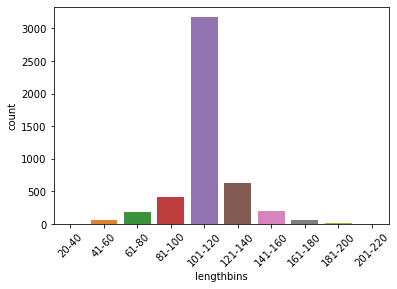

In [17]:
plt.xticks(rotation = 45)
sns.countplot(x = "lengthbins", data = moviedata)

In [18]:
df = df.reset_index(drop=True)

In [19]:
df_titles = df.copy()

In [20]:
df_titles = df_titles['title']

In [21]:
titles = df_titles.to_dict()

In [23]:
titles

{0: 'The Great British Baking Show',
 1: 'The Starling',
 2: 'Je Suis Karl',
 3: 'Grown Ups',
 4: 'Dark Skies',
 5: 'Paranoia',
 6: 'Birth of the Dragon',
 7: 'Safe House',
 8: 'Training Day',
 9: 'InuYasha the Movie 2: The Castle Beyond the Looking Glass',
 10: 'InuYasha the Movie 3: Swords of an Honorable Ruler',
 11: 'InuYasha the Movie 4: Fire on the Mystic Island',
 12: 'InuYasha the Movie: Affections Touching Across Time',
 13: 'Naruto Shippuden the Movie: Blood Prison',
 14: 'Naruto Shippûden the Movie: Bonds',
 15: 'Naruto Shippûden the Movie: The Will of Fire',
 16: 'Naruto Shippuden: The Movie',
 17: 'Naruto Shippuden: The Movie: The Lost Tower',
 18: 'Naruto the Movie 2: Legend of the Stone of Gelel',
 19: 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 20: 'Naruto the Movie: Ninja Clash in the Land of Snow',
 21: 'King of Boys',
 22: 'Kate',
 23: 'Omo Ghetto: the Saga',
 24: 'Paradise Hills',
 25: 'Show Dogs',
 26: 'If I Leave Here Tomorrow: A Film About Lyny

## Recommender Code ##

In [21]:
# Only need to run cells 22,25,26,28,and 30 in order for cell 31 to be used #

In [22]:
nlp = spacy.load('en_core_web_lg')

In [23]:
sim = {}

In [32]:

def func():
    count = 0
    for i, row in df.iterrows():
        doc = nlp(row['description'])
        sim[i]={}
        count = count + 1
        for j, row2 in df.iterrows():
            doc2 = nlp(row2['description'])
            sim[i][j] = doc.similarity(doc2)
    if (count % 100 == 0):
        print(count)

In [25]:
def lookup_by_title(title):
    for title_id in titles:
        if titles[title_id] == title:
            return title_id
    return None

In [34]:
similarities[0]

{0: 1.0,
 1: 0.9022030061187029,
 2: 0.8802959748246284,
 3: 0.9009243168360356,
 4: 0.861987168439197,
 5: 0.8485952626145536,
 6: 0.8244822848926722,
 7: 0.8625231408224138,
 8: 0.8564161096157192,
 9: 0.8785862339049453,
 10: 0.8812917706132765,
 11: 0.8418526569807553,
 12: 0.8947390063255998,
 13: 0.8184350987688677,
 14: 0.8548332587186345,
 15: 0.8950871899425142,
 16: 0.8565774279676966,
 17: 0.87839238181012,
 18: 0.8557672301224047,
 19: 0.7399447004777944,
 20: 0.8741382143102632,
 21: 0.8482221195570715,
 22: 0.902947545958047,
 23: 0.8801683369350137,
 24: 0.8977839314031376,
 25: 0.8577472076929836,
 26: 0.8242922244306654,
 27: 0.9114896827569975,
 28: 0.8700537890701397,
 29: 0.8340227370483566,
 30: 0.8697743812494501,
 31: 0.9041412937587835,
 32: 0.8522300293708522,
 33: 0.8728454391979726,
 34: 0.8885746734265181,
 35: 0.8473640881218607,
 36: 0.8420429093609816,
 37: 0.8585163972991089,
 38: 0.8473279223353067,
 39: 0.8939503340704513,
 40: 0.854484394513007,
 41: 

In [27]:
import pickle

# define dictionary

# create a binary pickle file 
f = open("DNU_dict.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(sim,f)

# close file
f.close()

In [28]:
infile = open('dict.pkl','rb')
similarities = pickle.load(infile)
infile.close()

In [29]:
func()

NameError: name 'func' is not defined

In [30]:
from heapq import nlargest
def recommend(item_title):
    six_largest = nlargest(6, 
                            similarities[lookup_by_title(item_title)], 
                            key=similarities[lookup_by_title(item_title)].get)
    six_largest.pop(0)
    for x in six_largest:
        print(titles[x])

In [31]:
recommend('The Great British Baking Show')

Shopkins: Chef Club
Belgica
Tune in for Love
Berlin Calling
Maacher Jhol


In [28]:
recommend('Naruto')

NameError: name 'recommend' is not defined

In [33]:
def lookup(title1, title2):
    return similarities[lookup_by_title(title1)][lookup_by_title(title2)]